In [1]:
####################################################################################
# Title -- Course 5 Task 2 -- 
# Step 1 -- Prepare and Explore the Data
# Step 2 -- Build and Evaluate the Models

# Last Updated -- 10 Dec 19

# File:  
# Step 1 -- Course 5 Task 2
# Step 2 -- Course 5 Task 3 (which will include Step 1)

# Project Name:  Credit One Customer Default Rates Analysis
####################################################################################

In [ ]:
####################################################################################
# Project Notes
####################################################################################

# Summary of Project:  Credit One has seen an increase in the number of custormers that
# default on their credit card payments.  This is bad because Credit One is the company 
# that approves the customer loans for its clients.  This is also bad as it is a loss of 
# revenue for the clients and potentially Credit One, if the clients no longer trust
# Credit One's approval methodology.  The project attempts to identify significant patterns
# in current customers that default on their loans and to build a model to predict if future
# customers are likely to default on their loans.  This analysis should further inform the
# Credit One methodology on approving loans for their clients.

# Summarize the top model and/or filtered dataset

In [ ]:
####################################################################################
# Housekeeping
####################################################################################

In [ ]:
# set working directory as necessary

In [ ]:
####################################################################################
# Load Packages
####################################################################################

In [223]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd #used for importing data
from pandas import Series, DataFrame
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os


#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)

from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

#cross validation
from sklearn.model_selection import train_test_split

# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

In [2]:
# Get working directory
os.getcwd()

'/Users/grantwisner/Desktop/UT Austin/Course 5/Task 2'

In [93]:
#set working directory as necessary
#os.chdir('')

In [205]:
####################################################################################
# Import Data
####################################################################################

In [155]:
# Load Raw datasets or Train/Test Dataset -- Dataset 1
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [370]:
# Load Predict / New datasets -- Dataset 2 (if any)

In [371]:
# Load any preprocessed datasets that have been saved

In [372]:
####################################################################################
# Evaluate Datasets
####################################################################################

In [373]:
# Dataset 1

In [374]:
#Get the number of columns and observations
credit.shape

(30000, 25)

In [4]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
#view top 5 rows of data
credit.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [235]:
#view bottom 5 rows of data
credit.tail(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29995      0             ...                  88004      31237      15980   
29996     -1             ...                   8979       5190          0   
29997     -1             ...                  20878      20582      19357   
29998      0             ...                  52774      11855      48944   
29999      0             ...                  36535      32428      15313   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
29995      8500     20000      5003      3047      5000      1000   
29996      1837      3526      8998       129         0         0   
29997         0         0     22000      4200      2000      3100   
29998     85900      3409      1178      1926     52964      1804   
29999      2078      1800      1430      1000      1000      1000   

       default payment next month  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[5 rows x 25 columns]

In [44]:
# View summary of the data
credit.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [237]:
# no missing values as all value counts are 3000

In [156]:
#list data types
credit.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [57]:
# View variables / counts / nulls / and variable types
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnm         30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [ ]:
####################################################################################
# Evaluate Variables
####################################################################################

In [6]:
# show values of Descriptive variables by themselves
credit[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000
mean    167484.322667      1.603733      1.853133      1.551867     35.485500
std     129747.661567      0.489129      0.790349      0.521970      9.217904
min      10000.000000      1.000000      0.000000      0.000000     21.000000
25%      50000.000000      1.000000      1.000000      1.000000     28.000000
50%     140000.000000      2.000000      2.000000      2.000000     34.000000
75%     240000.000000      2.000000      2.000000      2.000000     41.000000
max    1000000.000000      2.000000      6.000000      3.000000     79.000000

In [7]:
# show values of PAY
credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [8]:
# show values of bill amounts
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
max    927171.000000  961664.000000

In [244]:
# show values of Pay Amts
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000

In [245]:
# histograms of individual variables

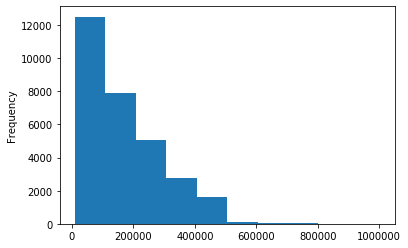

LIMIT_BAL
10000       493
16000         2
20000      1976
30000      1610
40000       230
           ... 
750000        4
760000        1
780000        2
800000        2
1000000       1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [9]:
# LIMIT_BAL -- Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her
# family (supplementary) credit
credit['LIMIT_BAL'].plot(kind='hist')
plt.show()
credit.groupby('LIMIT_BAL')['LIMIT_BAL'].count()

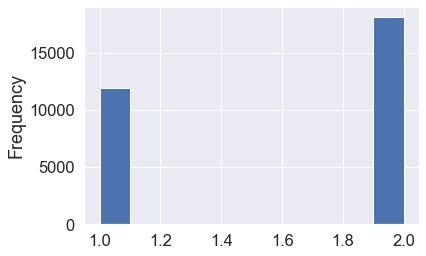

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [47]:
# sex -- Gender (1 = male; 2 = female).
credit['SEX'].plot(kind='hist')
plt.show()
credit.groupby('SEX')['SEX'].count()

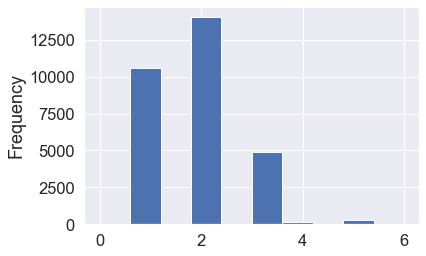

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [48]:
# Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
credit['EDUCATION'].plot(kind='hist')
plt.show()
credit.groupby('EDUCATION')['EDUCATION'].count()

In [157]:
# MARRIAGE Variable -- Need to group the "others" (0, 4, 5, 6)
credit['EDUCATION'] = np.where(credit['EDUCATION'] > 3 , 4,(np.where(credit['EDUCATION'] <1, 4, 
                                              credit['EDUCATION'])))

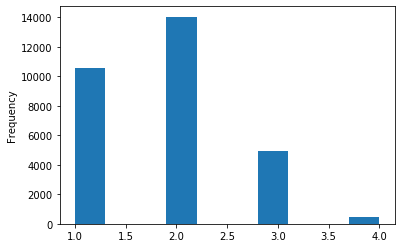

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

In [12]:
# Verifying Education Change
credit['EDUCATION'].plot(kind='hist')
plt.show()
credit.groupby('EDUCATION')['EDUCATION'].count()

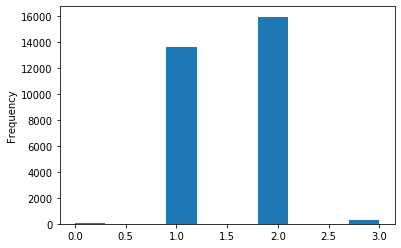

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [13]:
# MARRIAGE - Marital status (1 = married; 2 = single; 3 = divorce; 0=others)
credit['MARRIAGE'].plot(kind='hist')
plt.show()
credit.groupby('MARRIAGE')['MARRIAGE'].count()

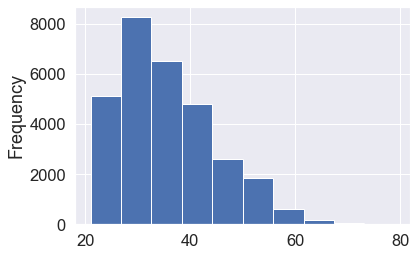

AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

In [52]:
# AGE - Age (year)
credit['AGE'].plot(kind='hist')
plt.show()
credit.groupby('AGE')['AGE'].count()

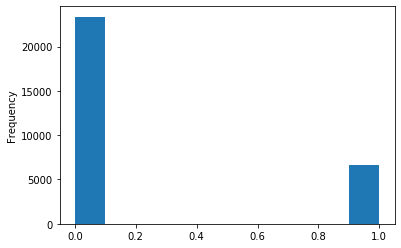

default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64

In [14]:
# default payment next month - client's behavior; Y=0 then not default, Y=1 then default"
credit['default payment next month'].plot(kind='hist')
plt.show()
credit.groupby('default payment next month')['default payment next month'].count()

In [197]:
####################################################################################
# Preprocessing
####################################################################################

In [198]:
# Dataset 1

In [158]:
#Removing Columns that aren't necessary
credit = credit.drop(columns = 'ID')

In [159]:
# Rename Variables
# Changing PAY_0 to PAY_1 to match BILL and PAY variables, Change Payment Next month to dpnm
credit = credit.rename(columns = {'PAY_0': 'PAY_1', 
                         'default payment next month': 'dpnm'})

In [160]:
# Creating Out of Box dataframe
credit_OOB = credit.copy()

In [55]:
# Changing Data types
#credit_OOB = credit_OOB.astype({'LIMIT_BAL': float, 'BILL_AMT1': float, 'BILL_AMT2': float, 'BILL_AMT3': float,
                        #'BILL_AMT4': float, 'BILL_AMT5': float, 'BILL_AMT6': float, 'PAY_AMT1': float,
                        #'PAY_AMT2': float, 'PAY_AMT3': float, 'PAY_AMT4': float, 'PAY_AMT5': float, 
                        #'PAY_AMT6': float, 'SEX': object, 'EDUCATION': object, 'MARRIAGE': object, 'AGE': object, 
                        #'dpnm': object})

In [161]:
#writing Out of Box file to csv
credit_OOB.to_csv('Credit_OOB.csv', index = False)

In [365]:
#discretization variables as necessary of analysis

In [162]:
#Age
credit['age_bins'] = pd.cut(credit['AGE'], bins=[0, 20, 35, 50, 65, 80, 100])

In [163]:
credit.groupby('age_bins')['age_bins'].count()

age_bins
(0, 20]          0
(20, 35]     16809
(35, 50]     10922
(50, 65]      2183
(65, 80]        86
(80, 100]        0
Name: age_bins, dtype: int64

In [164]:
#LIMIT_BAL
credit['limit_bal_bins'] = pd.cut(credit['LIMIT_BAL'], bins = [0, 175000, 300000, 475000, 625000, 1000000])

In [165]:
credit.groupby('limit_bal_bins')['limit_bal_bins'].count()

limit_bal_bins
(0, 175000]          17626
(175000, 300000]      7811
(300000, 475000]      3492
(475000, 625000]      1012
(625000, 1000000]       59
Name: limit_bal_bins, dtype: int64

In [166]:
# Checking to see if variables are renamed correctly and if variable was dropped
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm',
       'age_bins', 'limit_bal_bins'],
      dtype='object')

In [64]:
#rechecking shape to ensure variable numbers are correct
credit.shape

(30000, 26)

In [167]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_1             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-null 

In [ ]:
####################################################################################
# Perform Exploratory Data Analysis
####################################################################################

In [ ]:
##### Start of looking at individual descriptive variables #####

In [169]:
# Changing Data types
credit = credit.astype({'age_bins': str, 'limit_bal_bins': str})

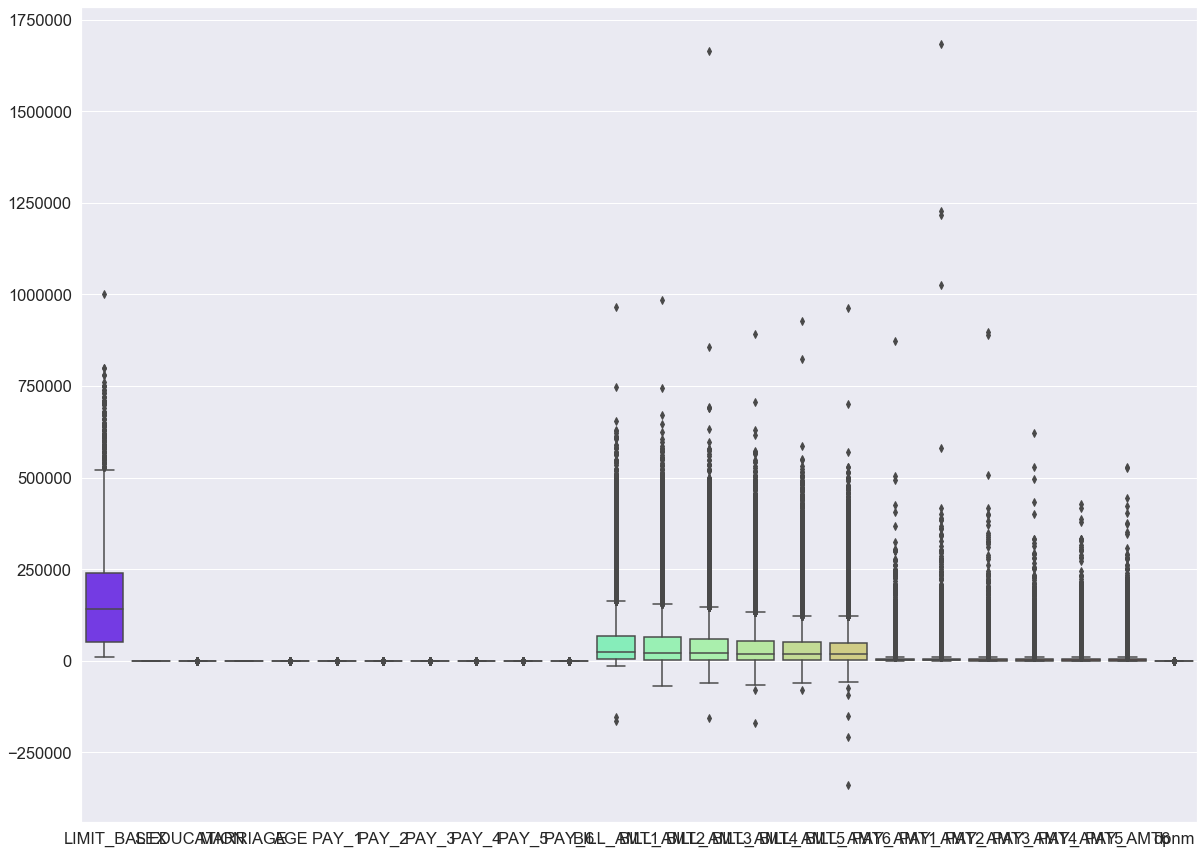

In [170]:
plt.figure(figsize=(20,15))
sns.boxplot(data = credit, palette = 'rainbow')
plt.show()

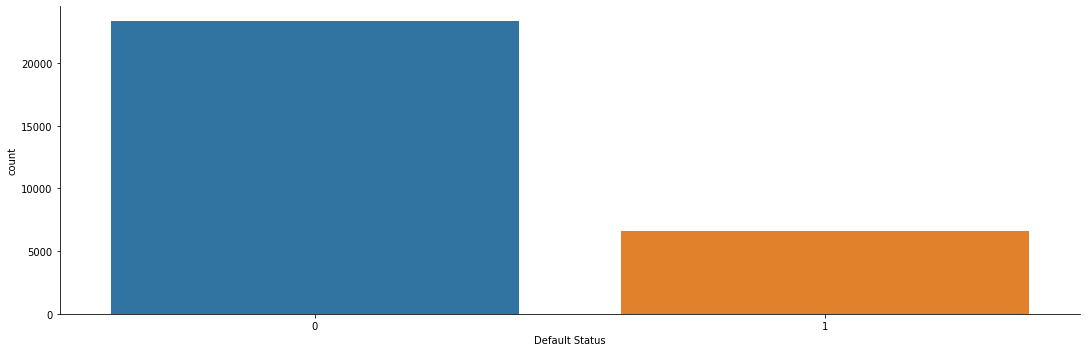

dpnm
0    23364
1     6636
Name: dpnm, dtype: int64

In [75]:
# Customers who have defaulted vs not defaulted
ds = sns.factorplot('dpnm', data=credit, kind='count', aspect=3.0)
ds.set_xlabels('Default Status')
plt.show()
credit.groupby('dpnm')['dpnm'].count() 
### Observation - a lot more people in "not defaulted status" than "default status"

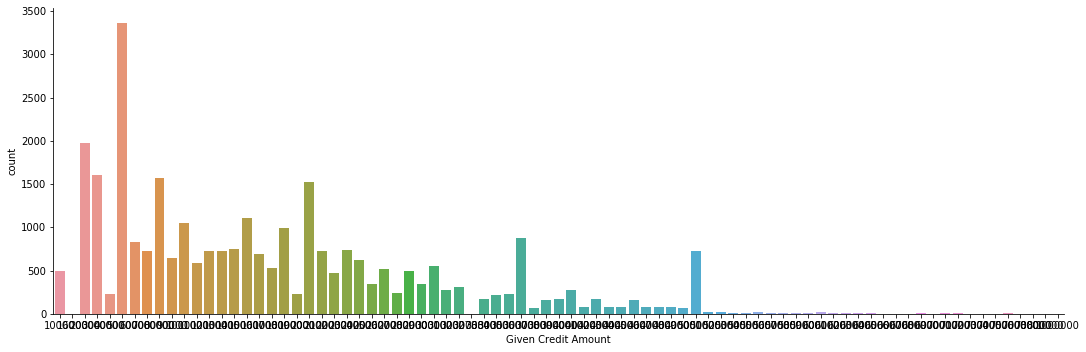

LIMIT_BAL
10000       493
16000         2
20000      1976
30000      1610
40000       230
           ... 
750000        4
760000        1
780000        2
800000        2
1000000       1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [76]:
# LIMIT_BAL
lb = sns.factorplot('LIMIT_BAL', data=credit, kind='count', aspect=3.0)
lb.set_xlabels('Given Credit Amount')
plt.show()
credit.groupby('LIMIT_BAL')['LIMIT_BAL'].count() 

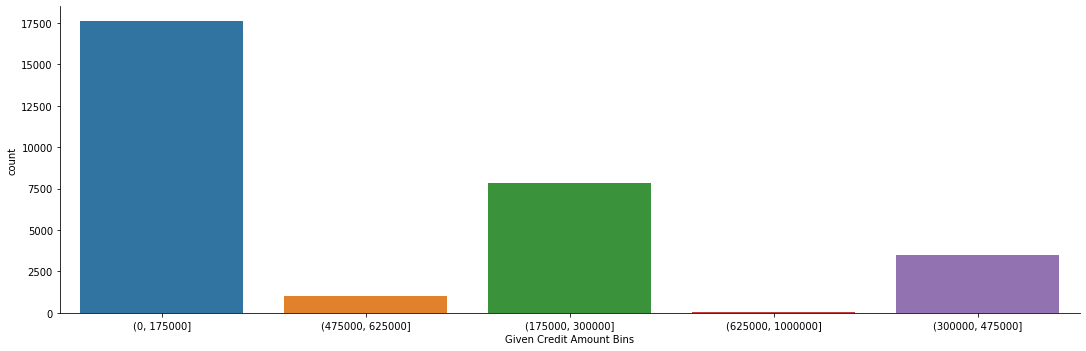

limit_bal_bins
(0, 175000]          17626
(175000, 300000]      7811
(300000, 475000]      3492
(475000, 625000]      1012
(625000, 1000000]       59
Name: limit_bal_bins, dtype: int64

In [77]:
# LIMIT_BAL Bins
lbb = sns.factorplot('limit_bal_bins', data=credit, kind='count', aspect=3.0)
lbb.set_xlabels('Given Credit Amount Bins')
plt.show()
credit.groupby('limit_bal_bins')['limit_bal_bins'].count() 

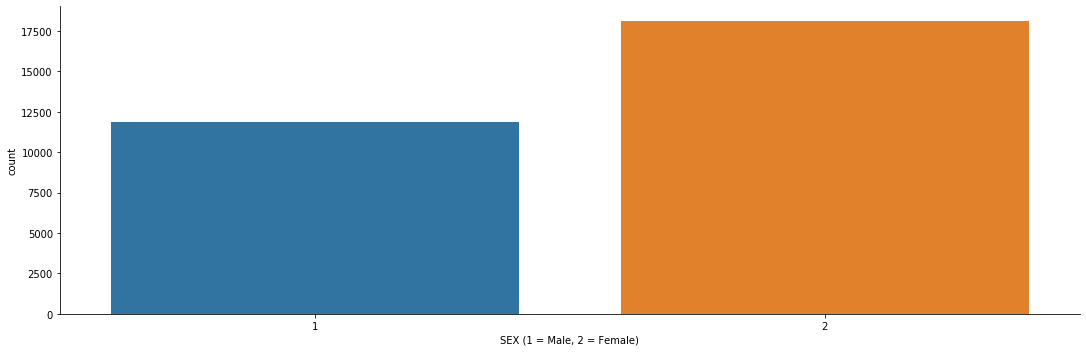

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [78]:
# Sex
sex = sns.factorplot('SEX', data=credit, kind='count', aspect=3.0)
sex.set_xlabels('SEX (1 = Male, 2 = Female)')
plt.show()
credit.groupby('SEX')['SEX'].count() 

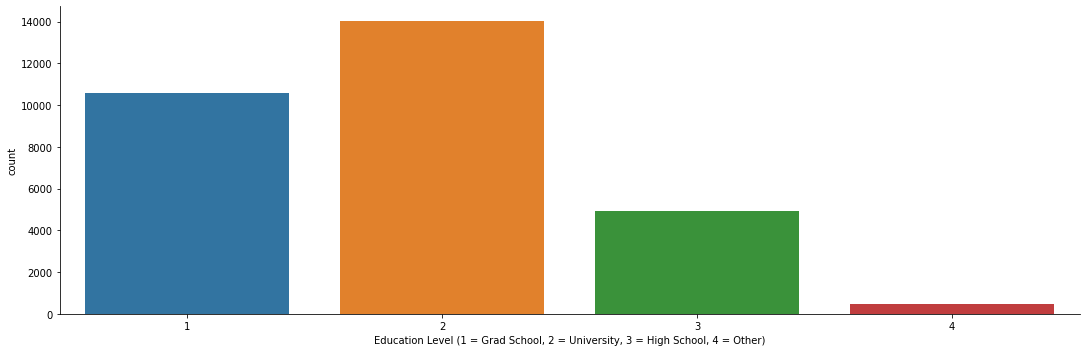

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

In [79]:
# Education
edu = sns.factorplot('EDUCATION', data=credit, kind='count', aspect=3.0)
edu.set_xlabels('Education Level (1 = Grad School, 2 = University, 3 = High School, 4 = Other)')
plt.show()
credit.groupby('EDUCATION')['EDUCATION'].count() 

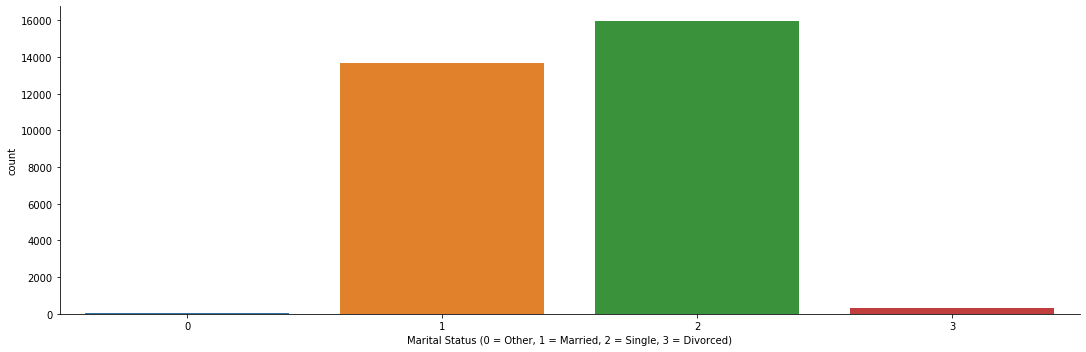

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [80]:
#MARRIAGE
mar = sns.factorplot('MARRIAGE', data=credit, kind='count', aspect=3.0)
mar.set_xlabels('Marital Status (0 = Other, 1 = Married, 2 = Single, 3 = Divorced)')
plt.show()
credit.groupby('MARRIAGE')['MARRIAGE'].count() 

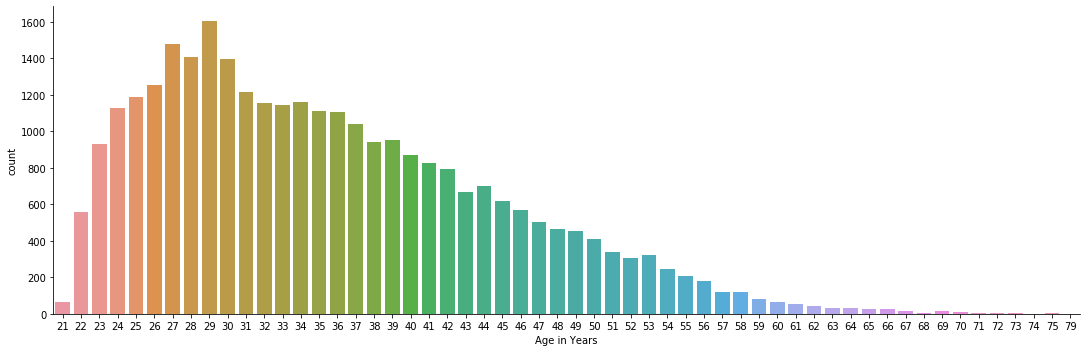

AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

In [81]:
# AGE
age = sns.factorplot('AGE', data=credit, kind='count', aspect=3.0)
age.set_xlabels('Age in Years')
plt.show()
credit.groupby('AGE')['AGE'].count() 

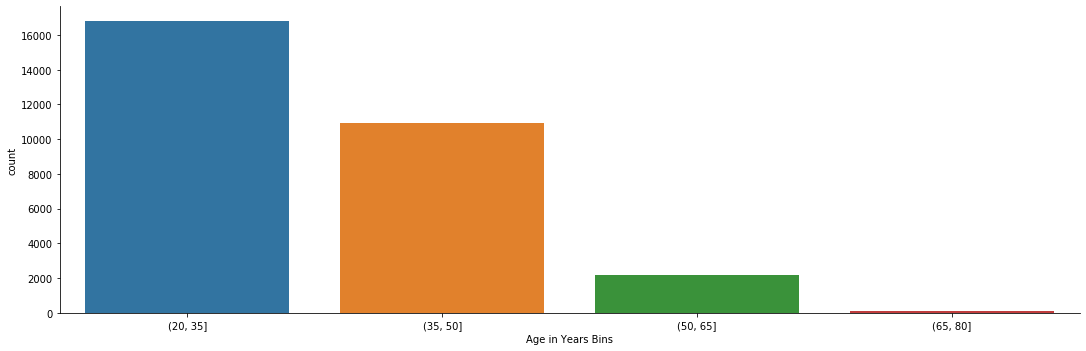

age_bins
(20, 35]    16809
(35, 50]    10922
(50, 65]     2183
(65, 80]       86
Name: age_bins, dtype: int64

In [82]:
# AGE bins
ageb = sns.factorplot('age_bins', data=credit, kind='count', aspect=3.0)
ageb.set_xlabels('Age in Years Bins')
plt.show()
credit.groupby('age_bins')['age_bins'].count() 

In [229]:
##### Start of comparing descriptive variables with the dependent variable (dpnm) #####

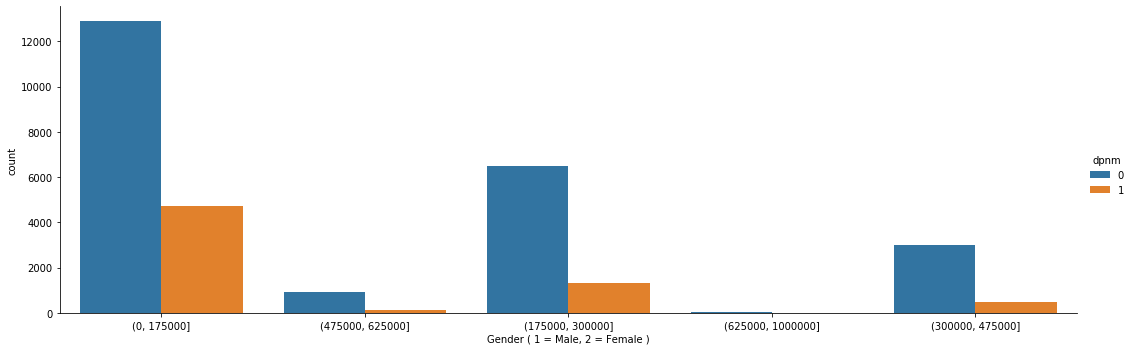

limit_bal_bins     dpnm
(0, 175000]        0       12902
                   1        4724
(175000, 300000]   0        6504
                   1        1307
(300000, 475000]   0        3005
                   1         487
(475000, 625000]   0         899
                   1         113
(625000, 1000000]  0          54
                   1           5
Name: limit_bal_bins, dtype: int64

In [83]:
# Limited Balance Bins in each of the default status
lbbd = sns.factorplot('limit_bal_bins', data=credit, hue='dpnm', kind='count', aspect=3.0)
lbbd.set_xlabels('Gender ( 1 = Male, 2 = Female )')
plt.show()
credit.groupby(['limit_bal_bins', 'dpnm'])['limit_bal_bins'].count()
#### Observation -- more default in the 0 to 175K range

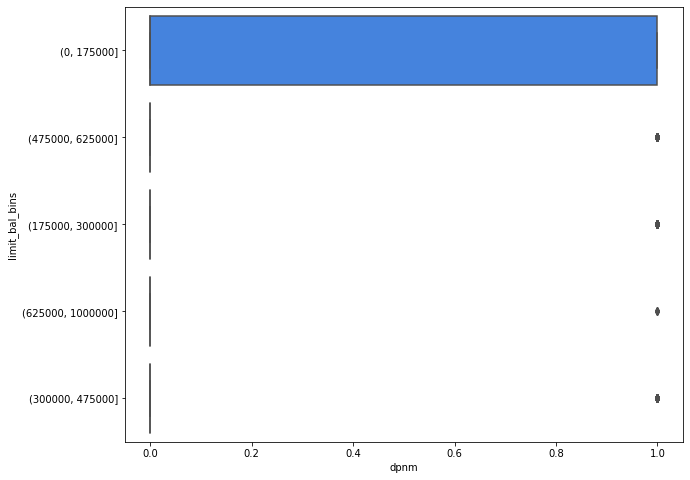

In [84]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', y = 'limit_bal_bins', data = credit, palette = 'rainbow')
plt.show()

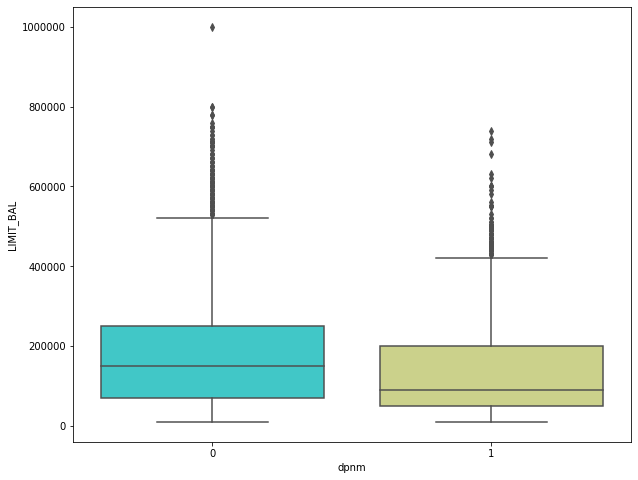

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', y = 'LIMIT_BAL', data = credit, palette = 'rainbow')
plt.show()

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


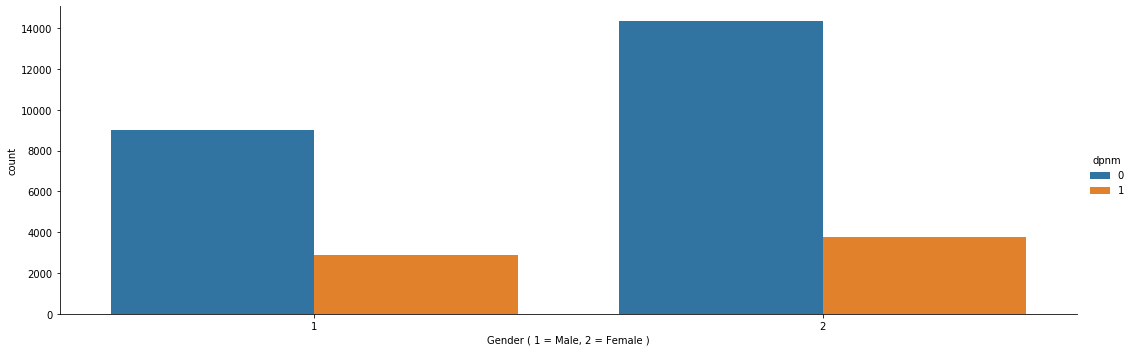

SEX  dpnm
1    0        9015
     1        2873
2    0       14349
     1        3763
Name: SEX, dtype: int64

In [86]:
# Number of men and women in each of default status
g = sns.factorplot('SEX', data=credit, hue='dpnm', kind='count', aspect=3.0)
g.set_xlabels('Gender ( 1 = Male, 2 = Female )')
plt.show()
credit.groupby(['SEX', 'dpnm'])['SEX'].count()
#### Observation -- more females are in default, but a higher proportion of males are in default

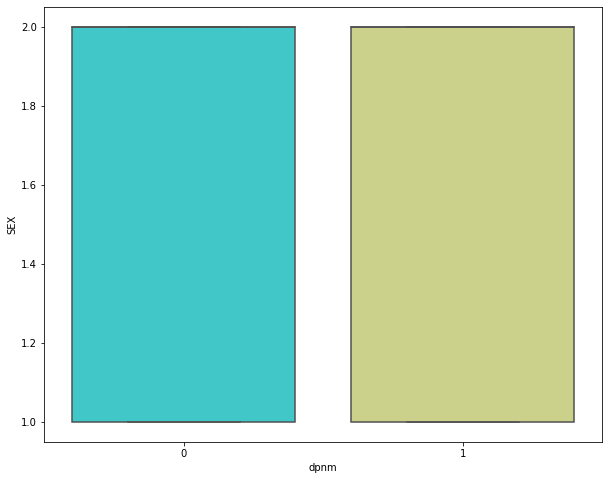

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', y = 'SEX', data = credit, palette = 'rainbow')
plt.show()

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


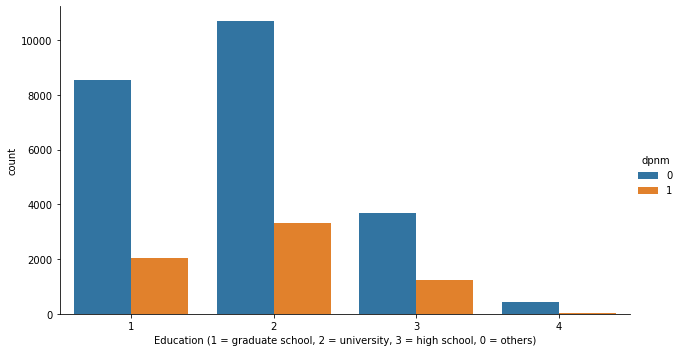

EDUCATION  dpnm
1          0        8549
           1        2036
2          0       10700
           1        3330
3          0        3680
           1        1237
4          0         435
           1          33
Name: EDUCATION, dtype: int64

In [88]:
# Education Level in each of default status
e = sns.factorplot('EDUCATION', data=credit, hue='dpnm', kind='count', aspect=1.75)
e.set_xlabels('Education (1 = graduate school, 2 = university, 3 = high school, 0 = others)')
plt.show()
credit.groupby(['EDUCATION', 'dpnm'])['EDUCATION'].count()
#### Observation -- more University educ level are in default, but higher proportion is in "Other" & "High School"

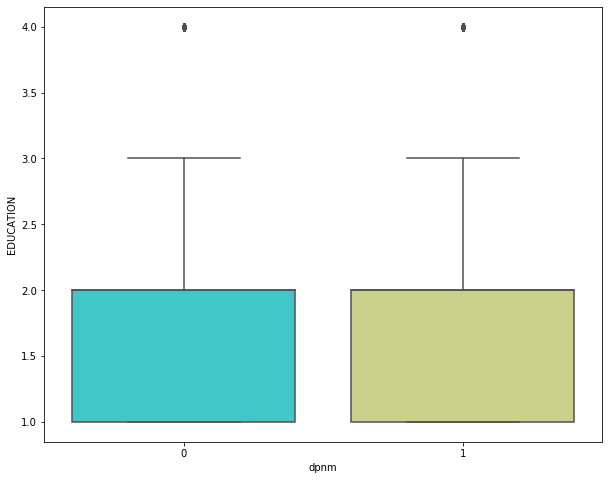

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', y = 'EDUCATION', data = credit, palette = 'rainbow')
plt.show()

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


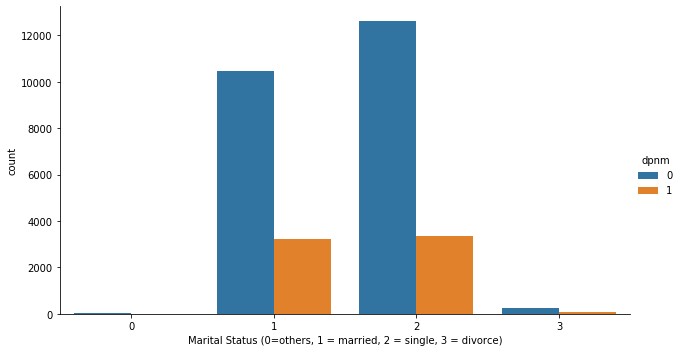

MARRIAGE  dpnm
0         0          49
          1           5
1         0       10453
          1        3206
2         0       12623
          1        3341
3         0         239
          1          84
Name: MARRIAGE, dtype: int64

In [90]:
# Marital Status in each of default status
m = sns.factorplot('MARRIAGE', data=credit, hue='dpnm', kind='count', aspect=1.75)
m.set_xlabels('Marital Status (0=others, 1 = married, 2 = single, 3 = divorce)')
plt.show()
credit.groupby(['MARRIAGE', 'dpnm'])['MARRIAGE'].count()
#### Observation -- more Single people are in default

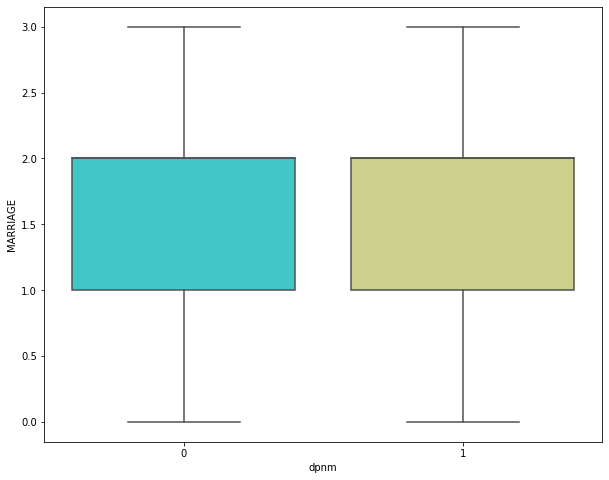

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', y = 'MARRIAGE', data = credit, palette = 'rainbow')
plt.show()

/Users/grantwisner/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


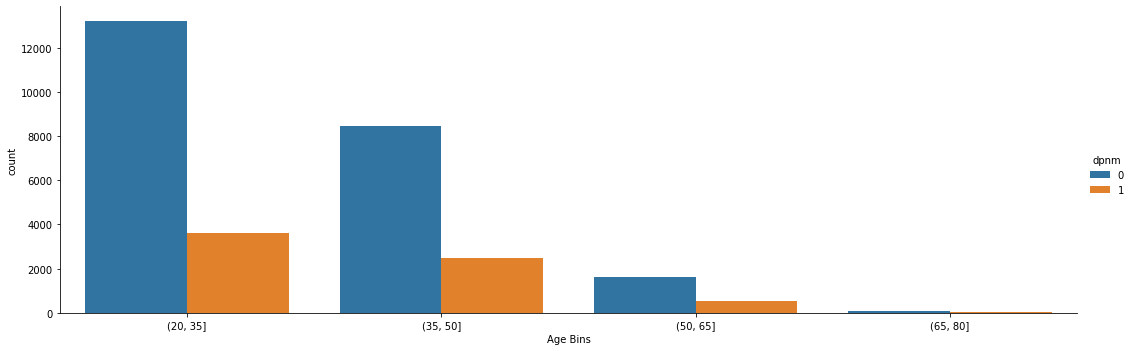

age_bins  dpnm
(20, 35]  0       13212
          1        3597
(35, 50]  0        8460
          1        2462
(50, 65]  0        1629
          1         554
(65, 80]  0          63
          1          23
Name: age_bins, dtype: int64

In [92]:
# Age bins in each of default status
abd = sns.factorplot('age_bins', data=credit, hue='dpnm', kind='count', aspect=3.0)
#abd['% of total'] = table.dpnm / table.dpnm.sum()
abd.set_xlabels('Age Bins')
plt.show()
credit.groupby(['age_bins', 'dpnm'])['age_bins'].count()
#### Observation -- more people age 20 to 35 default, although it is clear that a larger proportion of 35 to 50 default

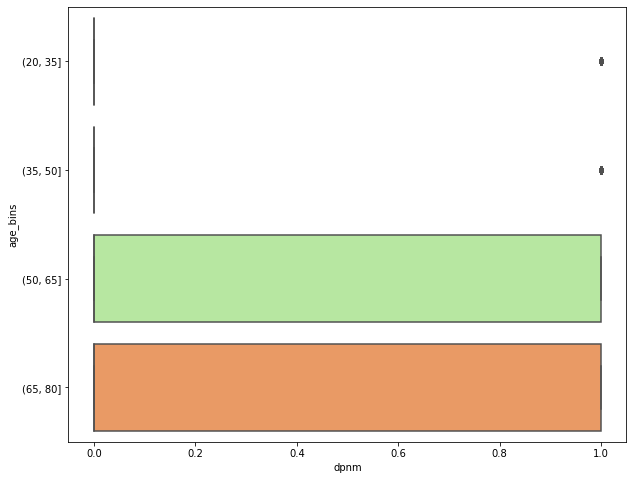

In [93]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', y = 'age_bins', data = credit, palette = 'rainbow')
plt.show()

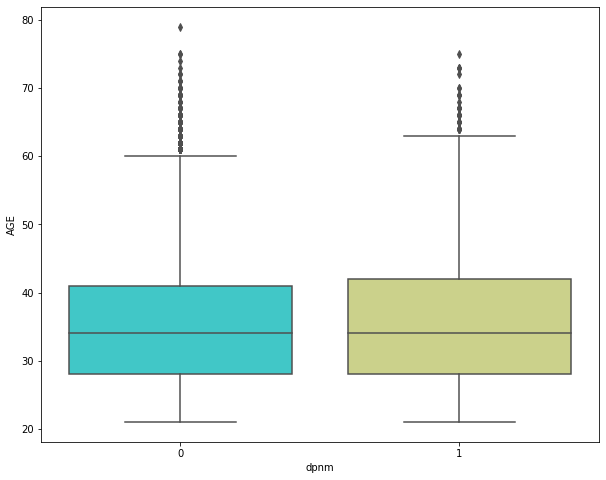

In [94]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', y = 'AGE', data = credit, palette = 'rainbow')
plt.show()

In [ ]:
### Start of comparing multiple variables to default status

In [96]:
# Number of customers in each default status grouped by limit_bal_bin and sex. 
credit.pivot_table('dpnm','limit_bal_bins', 'SEX',   aggfunc=np.sum, margins=True)
### Observation - limit balance between 0 and 175K who are Sex 2 (female) have the most defaults

SEX                   1     2   All
limit_bal_bins                     
(0, 175000]        2075  2649  4724
(175000, 300000]    533   774  1307
(300000, 475000]    207   280   487
(475000, 625000]     57    56   113
(625000, 1000000]     1     4     5
All                2873  3763  6636

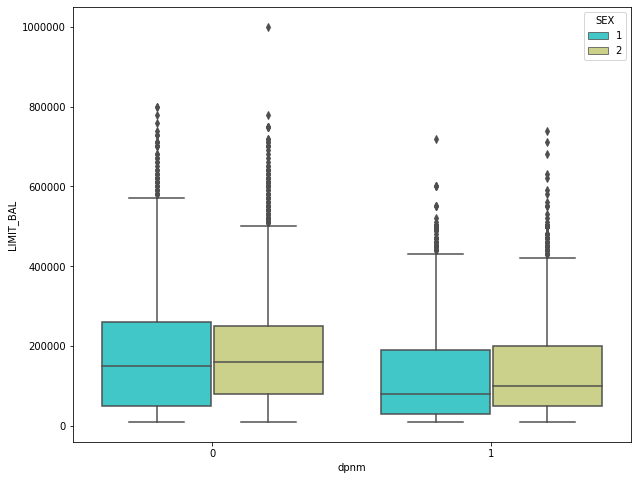

In [97]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'SEX', y = 'LIMIT_BAL', data = credit, palette = 'rainbow')
plt.show()

In [98]:
# Number of customers in each default status grouped by limit_bal_bin and education. 
credit.pivot_table('dpnm','limit_bal_bins', 'EDUCATION',   aggfunc=np.sum, margins=True)
### Observation - limit balance between 0 and 175K who are Education 2 (university) have the most defaults

EDUCATION             1     2     3   4   All
limit_bal_bins                               
(0, 175000]        1113  2568  1019  24  4724
(175000, 300000]    589   557   153   8  1307
(300000, 475000]    261   175    51   0   487
(475000, 625000]     70    28    14   1   113
(625000, 1000000]     3     2     0   0     5
All                2036  3330  1237  33  6636

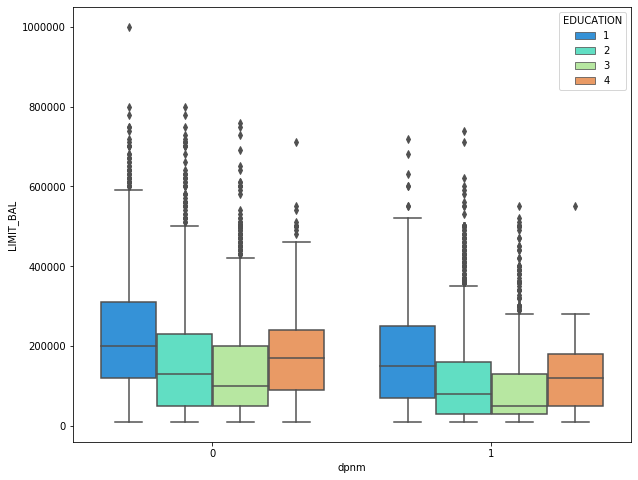

In [99]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'EDUCATION', y = 'LIMIT_BAL', data = credit, palette = 'rainbow')
plt.show()

In [100]:
# Number of customers in each default status grouped by limit_bal_bin and marital status. 
credit.pivot_table('dpnm','limit_bal_bins', 'MARRIAGE',   aggfunc=np.sum, margins=True)
### Observation - limit balance between 0 and 175K who are MARRIAGE 2 (divorced) have the most defaults

MARRIAGE             0       1       2     3   All
limit_bal_bins                                    
(0, 175000]        4.0  2133.0  2511.0  76.0  4724
(175000, 300000]   1.0   727.0   572.0   7.0  1307
(300000, 475000]   0.0   269.0   218.0   0.0   487
(475000, 625000]   NaN    74.0    38.0   1.0   113
(625000, 1000000]  NaN     3.0     2.0   NaN     5
All                5.0  3206.0  3341.0  84.0  6636

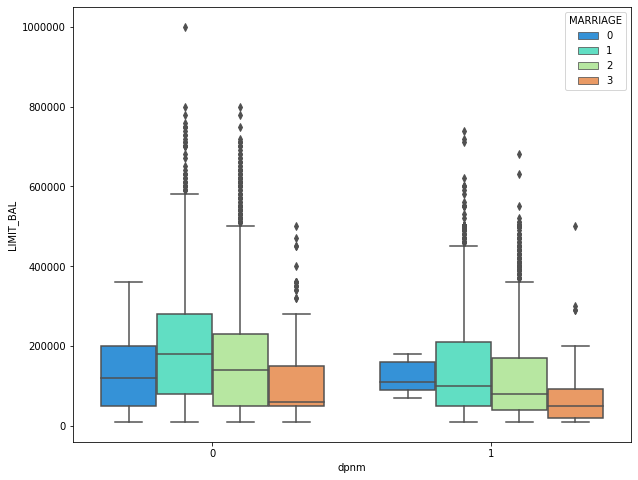

In [101]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'MARRIAGE', y = 'LIMIT_BAL', data = credit, palette = 'rainbow')
plt.show()

In [102]:
# Number of customers in each default status grouped by limit_bal_bin and age_bins. 
credit.pivot_table('dpnm','limit_bal_bins', 'age_bins',  aggfunc=np.sum, margins=True)
### Observation - limit balance between 0 and 175K who are 20 to 35 have the most defaults

age_bins           (20, 35]  (35, 50]  (50, 65]  (65, 80]   All
limit_bal_bins                                                 
(0, 175000]          2730.0    1591.0     393.0      10.0  4724
(175000, 300000]      620.0     575.0     104.0       8.0  1307
(300000, 475000]      212.0     233.0      38.0       4.0   487
(475000, 625000]       32.0      61.0      19.0       1.0   113
(625000, 1000000]       3.0       2.0       0.0       NaN     5
All                  3597.0    2462.0     554.0      23.0  6636

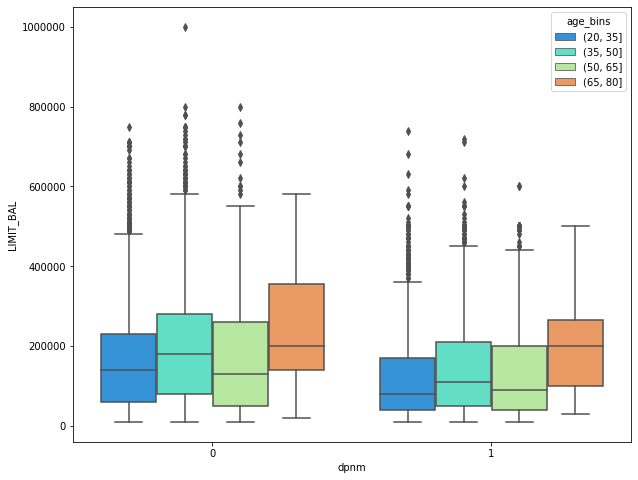

In [103]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'age_bins', y = 'LIMIT_BAL', data = credit, palette = 'rainbow')
plt.show()

In [104]:
# Number of customers in each default status grouped by sex and education. 
credit.pivot_table('dpnm','SEX','EDUCATION',   aggfunc=np.sum, margins=True)
### Observation - Sex 2 (females)  who are Education 2 (University) have the most defaults

EDUCATION     1     2     3   4   All
SEX                                  
1           906  1408   545  14  2873
2          1130  1922   692  19  3763
All        2036  3330  1237  33  6636

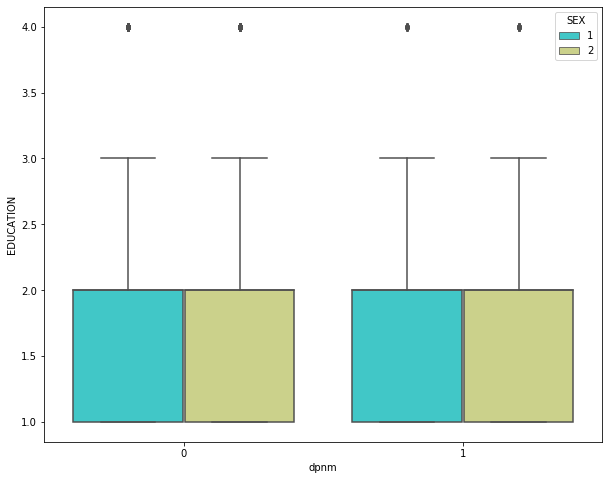

In [105]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'SEX', y = 'EDUCATION', data = credit, palette = 'rainbow')
plt.show()

In [106]:
# Number of customers in each default status grouped by sex and marital status. 
credit.pivot_table('dpnm','SEX','MARRIAGE',   aggfunc=np.sum, margins=True)
### Observation - Marital status 1 (married) & 2 (divorced) who are Sex 2 (female) have the most defaults

MARRIAGE  0     1     2   3   All
SEX                              
1         2  1346  1485  40  2873
2         3  1860  1856  44  3763
All       5  3206  3341  84  6636

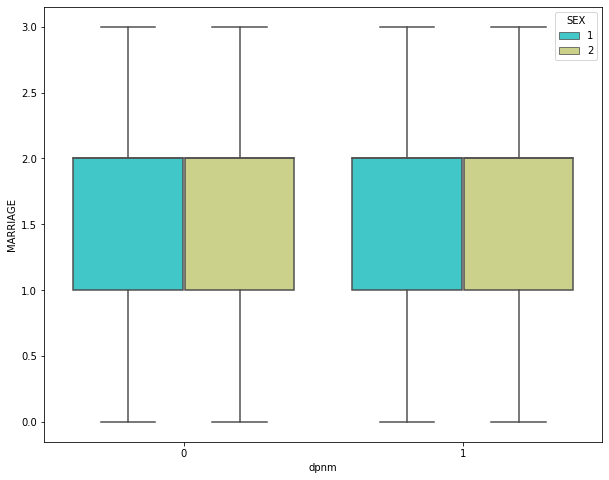

In [107]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'SEX', y = 'MARRIAGE', data = credit, palette = 'rainbow')
plt.show()

In [108]:
# Number of customers in each default status grouped by sex and age bins. 
credit.pivot_table('dpnm','SEX','age_bins',   aggfunc=np.sum, margins=True)
### Observation - age between 20 and 35 and who are Sex 2 (female) have the most defaults

age_bins  (20, 35]  (35, 50]  (50, 65]  (65, 80]   All
SEX                                                   
1             1416      1158       286        13  2873
2             2181      1304       268        10  3763
All           3597      2462       554        23  6636

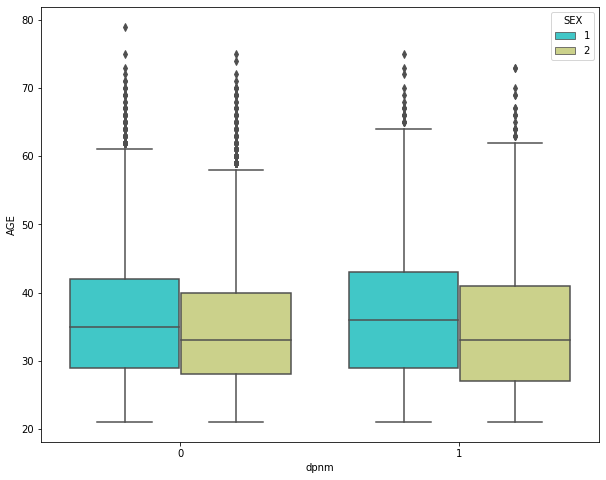

In [109]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'SEX', y = 'AGE', data = credit, palette = 'rainbow')
plt.show()

In [110]:
# Number of customers in each default status grouped by education level and marital status. 
credit.pivot_table('dpnm','EDUCATION','MARRIAGE',   aggfunc=np.sum, margins=True)
### Observation - Marital status 1 (married) & 2 who are education 2 (university) have the most defaults

MARRIAGE     0       1       2     3   All
EDUCATION                                 
1          0.0   769.0  1254.0  13.0  2036
2          1.0  1666.0  1619.0  44.0  3330
3          4.0   754.0   452.0  27.0  1237
4          NaN    17.0    16.0   0.0    33
All        5.0  3206.0  3341.0  84.0  6636

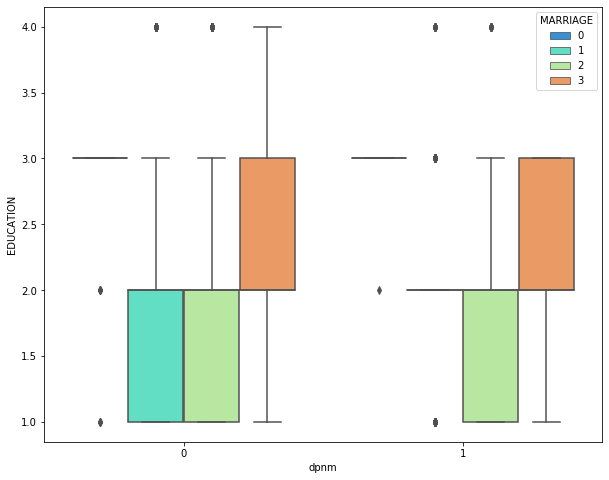

In [111]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'MARRIAGE', y = 'EDUCATION', data = credit, palette = 'rainbow')
plt.show()

In [112]:
# Number of customers in each default status grouped by education level and age bins. 
credit.pivot_table('dpnm','EDUCATION','age_bins',   aggfunc=np.sum, margins=True)
### Observation - aged 20 to 35 who are education 2 (university) have the most defaults

age_bins   (20, 35]  (35, 50]  (50, 65]  (65, 80]   All
EDUCATION                                              
1              1240       668       121         7  2036
2              1912      1198       213         7  3330
3               433       579       216         9  1237
4                12        17         4         0    33
All            3597      2462       554        23  6636

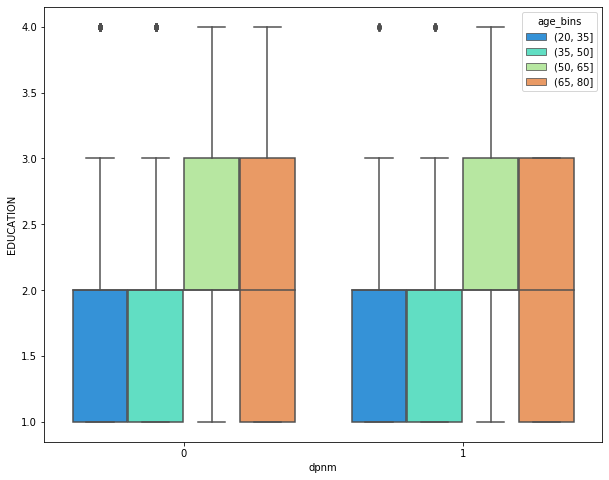

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dpnm', hue= 'age_bins', y = 'EDUCATION', data = credit, palette = 'rainbow')
plt.show()

In [ ]:
####################################################################################
# Split data into default vs non-default to complete percentages / proportions
####################################################################################

In [171]:
not_defaulted = credit[credit['dpnm']==0]

In [172]:
len(not_defaulted)

23364

In [173]:
defaulted = credit[credit['dpnm']==1]

In [174]:
len(defaulted)

6636

In [175]:
lb_snd = not_defaulted.pivot_table('dpnm', 'limit_bal_bins', 'SEX', aggfunc=len, margins=True)
lb_sd = defaulted.pivot_table('dpnm', 'limit_bal_bins', 'SEX', aggfunc=len, margins=True)
ls = (lb_sd / (lb_sd + lb_snd)) * 100
print(ls)
### observation -- highest default percent is 0 to 175K and Sex 1(male)

SEX                        1          2        All
limit_bal_bins                                    
(0, 175000]        28.859527  25.383289  26.801316
(175000, 300000]   19.241877  15.354096  16.732813
(300000, 475000]   14.425087  13.612056  13.946163
(475000, 625000]   12.231760  10.256410  11.166008
(625000, 1000000]   3.703704  12.500000   8.474576
All                24.167227  20.776281  22.120000


In [119]:
lb_end = not_defaulted.pivot_table('dpnm', 'limit_bal_bins', 'EDUCATION', aggfunc=len, margins=True)
lb_ed = defaulted.pivot_table('dpnm', 'limit_bal_bins', 'EDUCATION', aggfunc=len, margins=True)
le = (lb_ed / (lb_ed + lb_end)) * 100
print(le)
### observation -- highest default percent is 0 to 175K and Education 3 (high school)

EDUCATION                  1          2          3         4        All
limit_bal_bins                                                         
(0, 175000]        24.553276  27.831364  28.149171  9.756098  26.801316
(175000, 300000]   16.475524  17.406250  17.525773  4.907975  16.732813
(300000, 475000]   14.177078  13.693271  15.548780       NaN  13.946163
(475000, 625000]   11.589404   9.180328  15.555556  7.692308  11.166008
(625000, 1000000]   9.375000  10.000000        NaN       NaN   8.474576
All                19.234766  23.734854  25.157616  7.051282  22.120000


In [120]:
lb_mnd = not_defaulted.pivot_table('dpnm', 'limit_bal_bins', 'MARRIAGE', aggfunc=len, margins=True)
lb_md = defaulted.pivot_table('dpnm', 'limit_bal_bins', 'MARRIAGE', aggfunc=len, margins=True)
lm = (lb_md / (lb_md + lb_mnd)) * 100
print(lm)
### observation -- highest default percent is 0 to 175K and Marriage 1 (Single) and 3 (Divorced)

MARRIAGE                   0          1          2          3        All
limit_bal_bins                                                          
(0, 175000]        11.428571  29.095621  25.125075  28.571429  26.801316
(175000, 300000]    5.555556  18.712999  14.784182  17.948718  16.732813
(300000, 475000]         NaN  14.691425  13.260341        NaN  13.946163
(475000, 625000]         NaN  12.671233   8.920188  50.000000  11.166008
(625000, 1000000]        NaN  10.714286   6.451613        NaN   8.474576
All                 9.259259  23.471704  20.928339  26.006192  22.120000


In [121]:
lb_and = not_defaulted.pivot_table('dpnm', 'limit_bal_bins', 'age_bins', aggfunc=len, margins=True)
lb_ad = defaulted.pivot_table('dpnm', 'limit_bal_bins', 'age_bins', aggfunc=len, margins=True)
la = (lb_ad / (lb_ad + lb_and)) * 100
print(la)
### observation -- highest default percent is 0 to 175K and Age 65 to 80

age_bins            (20, 35]   (35, 50]   (50, 65]   (65, 80]        All
limit_bal_bins                                                          
(0, 175000]        25.869421  28.104575  28.478261  31.250000  26.801316
(175000, 300000]   15.001210  18.013784  22.857143  25.806452  16.732813
(300000, 475000]   12.197929  15.471448  16.379310  25.000000  13.946163
(475000, 625000]    8.791209  11.487759  17.272727  14.285714  11.166008
(625000, 1000000]  14.285714   6.250000        NaN        NaN   8.474576
All                21.399250  22.541659  25.377920  26.744186  22.120000


In [122]:
s_end = not_defaulted.pivot_table('dpnm', 'SEX', 'EDUCATION', aggfunc=len, margins=True)
s_ed = defaulted.pivot_table('dpnm', 'SEX', 'EDUCATION', aggfunc=len, margins=True)
se = (s_ed / (s_ed + s_end)) * 100
print(se)
### observation -- highest default Sex 1(males) who have education 2 (university) & 3 (high school) 

EDUCATION          1          2          3         4        All
SEX                                                            
1          20.808452  26.200223  27.386935  8.235294  24.167227
2          18.135131  22.204251  23.641954  6.375839  20.776281
All        19.234766  23.734854  25.157616  7.051282  22.120000


In [123]:
s_mnd = not_defaulted.pivot_table('dpnm', 'SEX', 'MARRIAGE', aggfunc=len, margins=True)
s_md = defaulted.pivot_table('dpnm', 'SEX', 'MARRIAGE', aggfunc=len, margins=True)
sm = (s_md / (s_md + s_mnd)) * 100
print(se)
### observation -- highest default Sex 1(males) who have marital status 3 (Divorced) 

EDUCATION          1          2          3         4        All
SEX                                                            
1          20.808452  26.200223  27.386935  8.235294  24.167227
2          18.135131  22.204251  23.641954  6.375839  20.776281
All        19.234766  23.734854  25.157616  7.051282  22.120000


In [124]:
s_and = not_defaulted.pivot_table('dpnm', 'SEX', 'age_bins', aggfunc=len, margins=True)
s_ad = defaulted.pivot_table('dpnm', 'SEX', 'age_bins', aggfunc=len, margins=True)
sa = (s_ad / (s_ad + s_and)) * 100
print(sa)
### observation -- highest default Sex 1(males) who are older than 65 

age_bins   (20, 35]   (35, 50]   (50, 65]   (65, 80]        All
SEX                                                            
1         23.020647  24.951519  27.238095  28.260870  24.167227
2         20.463502  20.761025  23.654016  25.000000  20.776281
All       21.399250  22.541659  25.377920  26.744186  22.120000


In [125]:
e_mnd = not_defaulted.pivot_table('dpnm', 'EDUCATION', 'MARRIAGE', aggfunc=len, margins=True)
e_md = defaulted.pivot_table('dpnm', 'EDUCATION', 'MARRIAGE', aggfunc=len, margins=True)
em = (e_md / (e_md + e_mnd)) * 100
print(em)
### observation -- highest default Marriage 3 (Divorce) and Education 2 (University)

MARRIAGE           0          1          2          3        All
EDUCATION                                                       
1                NaN  20.660935  18.416801  26.000000  19.234766
2          16.666667  24.349605  23.062678  27.160494  23.734854
3           9.090909  26.354422  23.677318  26.213592  25.157616
4                NaN   7.264957   7.079646        NaN   7.051282
All         9.259259  23.471704  20.928339  26.006192  22.120000


In [126]:
e_and = not_defaulted.pivot_table('dpnm', 'EDUCATION', 'age_bins', aggfunc=len, margins=True)
e_ad = defaulted.pivot_table('dpnm', 'EDUCATION', 'age_bins', aggfunc=len, margins=True)
ea = (e_ad / (e_ad + e_and)) * 100
print(ea)
### observation -- highest Education 3 (High School) who are 65 or older

age_bins    (20, 35]   (35, 50]   (50, 65]   (65, 80]        All
EDUCATION                                                       
1          18.438662  20.144753  23.314066  28.000000  19.234766
2          23.529412  23.430471  27.734375  30.434783  23.734854
3          25.292056  25.086655  25.087108  25.000000  25.157616
4           4.878049   9.189189  11.428571        NaN   7.051282
All        21.399250  22.541659  25.377920  26.744186  22.120000


In [127]:
m_and = not_defaulted.pivot_table('dpnm', 'MARRIAGE', 'age_bins', aggfunc=len, margins=True)
m_ad = defaulted.pivot_table('dpnm', 'MARRIAGE', 'age_bins', aggfunc=len, margins=True)
ma = (m_ad / (m_ad + m_and)) * 100
print(ma)
### observation -- highest Marriage 3 (Divorced) who are 50 to 65 years old

age_bins   (20, 35]   (35, 50]   (50, 65]   (65, 80]        All
MARRIAGE                                                       
0          9.090909  11.111111        NaN        NaN   9.259259
1         23.371041  22.783300  26.728395  28.378378  23.471704
2         20.684887  21.991178  20.247934  16.666667  20.928339
3         26.027397  23.863636  31.081081        NaN  26.006192
All       21.399250  22.541659  25.377920  26.744186  22.120000


In [ ]:
####################################################################################
# END OF EDA
####################################################################################

In [ ]:
####################################################################################
# Creating new dataframes for analysis
####################################################################################

In [176]:
#### create a new dataframe of dummy variables and binned variables
credit_DV = credit.copy()

In [177]:
# Create dummy variables for all categorical variables
categorical_vars = ['age_bins', 'limit_bal_bins', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
                    'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
credit_DV[categorical_vars] = credit_DV[categorical_vars].astype(str) 
credit_DV = pd.get_dummies(credit_DV,columns=categorical_vars,drop_first=True)
credit_DV.head()

LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      20000   24       3913       3102        689          0          0   
1     120000   26       2682       1725       2682       3272       3455   
2      90000   34      29239      14027      13559      14331      14948   
3      50000   37      46990      48233      49291      28314      28959   
4      50000   57       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_5_8  PAY_6_-2  PAY_6_0  PAY_6_2  \
0          0         0       689  ...        0         1        0        0   
1       3261         0      1000  ...        0         0        0        1   
2      15549      1518      1500  ...        0         0        1        0   
3      29547      2000      2019  ...        0         0        1        0   
4      19131      2000     36681  ...        0         0        1        0   

   PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 87 columns]

In [178]:
#writing new file to csv
credit_DV.to_csv('Credit_DV.csv', index = False)

In [ ]:
####################################################################################
# Complete Recursive Feature Elimination
####################################################################################

In [226]:
#Use RFE on the OOB dataframe
array = credit_OOB.values
X = array[:,0:23]
Y = array[:,23]
model = GradientBoostingClassifier()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)

In [227]:
fit.support_, fit.ranking_

(array([ True, False, False, False, False,  True,  True,  True, False,
         True,  True,  True, False, False, False, False, False,  True,
         True,  True, False, False, False]),
 array([ 1, 14,  8, 13,  7,  1,  1,  1,  2,  1,  1,  1,  3, 12,  6, 11,  9,
         1,  1,  1,  4, 10,  5]))

In [262]:
credit_OOB_RFE = credit_OOB.copy()

In [263]:
credit_OOB_RFE.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

In [264]:
credit_OOB_RFE = credit_OOB_RFE[['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_5', 'PAY_6', 'BILL_AMT1',  'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'dpnm']]

In [265]:
credit_OOB_RFE.columns

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'dpnm'],
      dtype='object')

In [266]:
#writing new file to csv
credit_OOB_RFE.to_csv('Credit_OOB_RFE.csv', index = False)

In [248]:
#Use RFE on the dummy variable dataframe
credit_DV = credit_DV.drop(columns=['dpnm']).assign(dpnm=credit_DV['dpnm'])
array = credit_DV.values
X = array[:,0:86]
Y = array[:,86]
model = GradientBoostingClassifier()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)

In [249]:
fit.support_, fit.ranking_

(array([ True, False,  True, False, False, False, False, False,  True,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]),
 array([ 1, 11,  1,  3,  9,  5, 16, 13,  1,  1,  2,  7, 12,  8, 25, 49, 72,
        71, 75, 51, 53, 22, 38, 33, 15, 20, 30, 34, 18, 10, 14,  1,  1, 19,
        40, 74, 73, 61, 63, 65, 57,  1,  4, 39, 27, 29, 46, 41, 28, 32, 67,
         1, 21, 44, 37, 36, 55, 45, 68, 42, 70,  1, 48, 24, 69, 50, 52, 60,
        62, 

In [251]:
credit_DV_RFE = credit_DV.copy()

In [252]:
credit_DV_RFE.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'age_bins_(35, 50]',
       'age_bins_(50, 65]', 'age_bins_(65, 80]',
       'limit_bal_bins_(175000, 300000]', 'limit_bal_bins_(300000, 475000]',
       'limit_bal_bins_(475000, 625000]', 'limit_bal_bins_(625000, 1000000]',
       'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-2', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8',
       'PAY_2_-2', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7',

In [253]:
credit_DV_RFE = credit_DV_RFE[['LIMIT_BAL', 'BILL_AMT1','PAY_AMT1', 'PAY_AMT2', 'PAY_1_2',
       'PAY_1_3', 'PAY_2_2', 'PAY_3_2', 'PAY_4_2', 'PAY_5_2','dpnm']]

In [255]:
credit_DV_RFE.columns

Index(['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_1_2', 'PAY_1_3',
       'PAY_2_2', 'PAY_3_2', 'PAY_4_2', 'PAY_5_2', 'dpnm'],
      dtype='object')

In [256]:
#writing new file to csv
credit_DV_RFE.to_csv('Credit_DV_RFE.csv', index = False)

In [ ]:
####################################################################################
# Complete Correlation matrix and feature selection
####################################################################################

In [188]:
## Out of Box & Out of Box scale -- scaling won't change correlation
corrMat_OOB = credit_OOB.corr()
print(corrMat_OOB)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1  \
LIMIT_BAL   1.000000  0.024755  -0.231088 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.013627 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.231088  0.013627   1.000000 -0.149134  0.182434  0.112593   
MARRIAGE   -0.108139 -0.031389  -0.149134  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.182434 -0.414170  1.000000 -0.039447   
PAY_1      -0.271214 -0.057643   0.112593  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.129703  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.122425  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.116531  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.104088  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.088986  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.016597 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

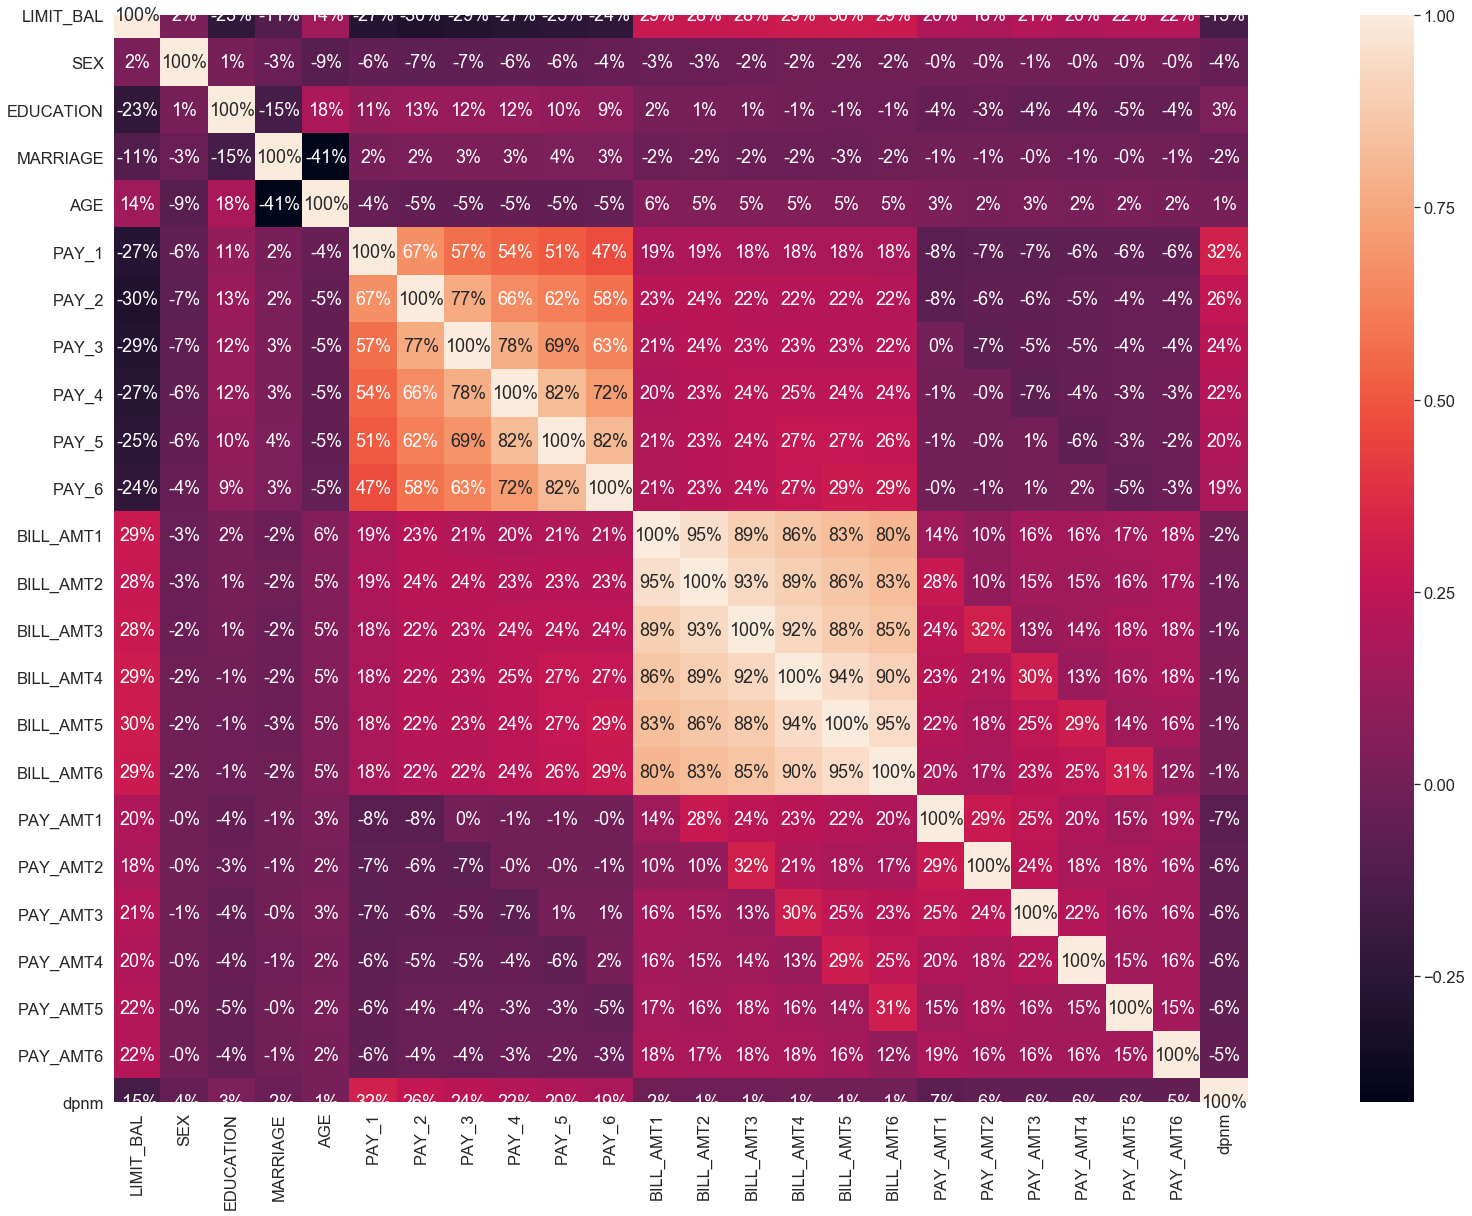

In [189]:
sns.set(font_scale=1.5)
plt.figure(figsize=(40,20))
sns.heatmap(corrMat_OOB, square=True, annot = True, fmt="0.00%")
plt.show()

In [194]:
#Dropping highly correlated variables
credit_OOB_FS = credit_OOB.copy()
credit_OOB_FS = credit_OOB_FS.drop(columns=['BILL_AMT2', 'BILL_AMT4', 'BILL_AMT6'])
credit_OOB_FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT5    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dpnm         30000 non-null int64
dtypes: int64(21)
memory usage: 4.8 MB


In [195]:
#writing new file to csv
credit_OOB_FS.to_csv('Credit_OOB_FS.csv', index = False)

In [196]:
corrMat_dv = credit_DV.corr()
print(corrMat_dv)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
...              ...       ...        ...        ...        ...        ...   
PAY_6_4    -0.033762 -0.003295  -0.012509  -0.011187  -0.009366  -0.006833   
PAY_6_5    -0.009595  0.000467  -0.001839  -0.000630   0.002317   0.004055   
PAY_6_6    -0.015647 -0.004057  -0.003726  -0.002239  -0.000815   0.001301   
PAY_6_7    -0.032136  0.008379  -0.026136  -0.025914  -0.025372  -0.025066   
PAY_6_8    -0.006450  0.002670  -0.001519  -0.000315  -0.000154   0.000791   

           BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...   PAY_

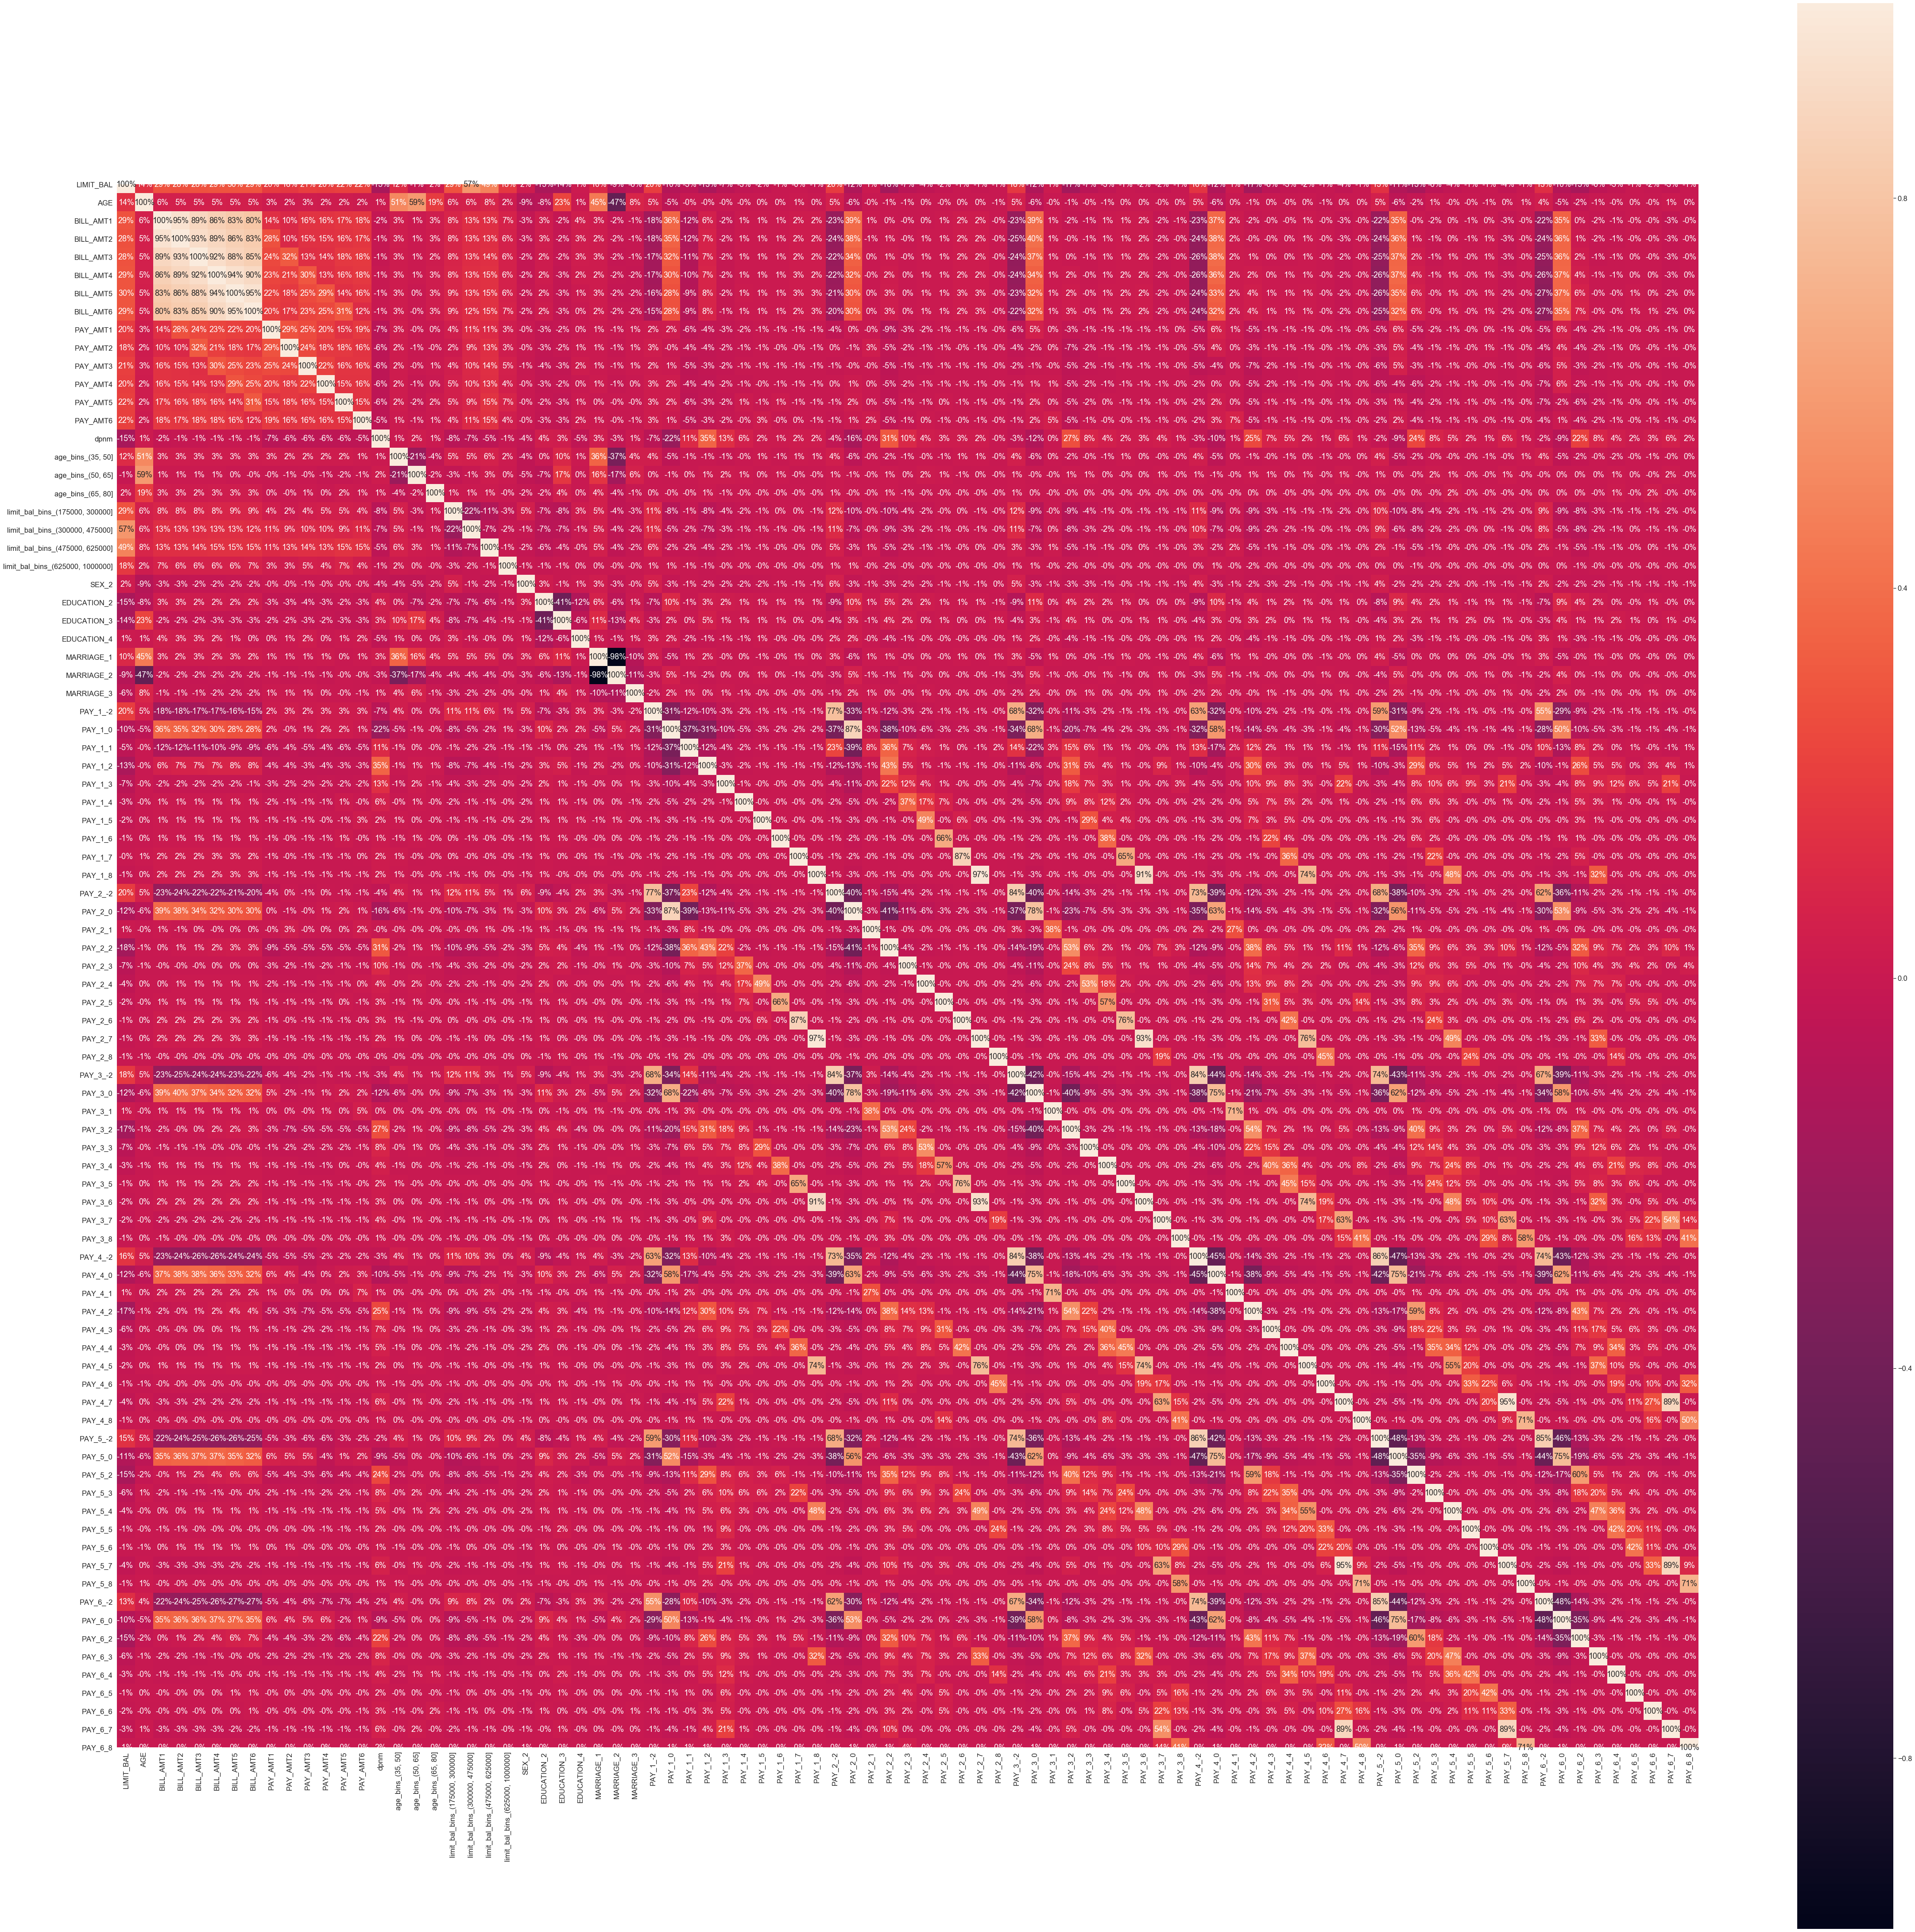

In [198]:
sns.set(font_scale=1.5)
plt.figure(figsize=(80,80))
sns.heatmap(corrMat_dv, square=True, annot = True, fmt="0.00%")
plt.show()

In [199]:
#Dropping highly correlated variables
credit_DV_FS = credit_DV.copy()
credit_DV_FS = credit_DV_FS.drop(columns=['BILL_AMT2', 'BILL_AMT4', 'BILL_AMT6', 'PAY_1_8', 'PAY_2_7', 'PAY_4_7'])
credit_DV_FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 81 columns):
LIMIT_BAL                           30000 non-null int64
AGE                                 30000 non-null int64
BILL_AMT1                           30000 non-null int64
BILL_AMT3                           30000 non-null int64
BILL_AMT5                           30000 non-null int64
PAY_AMT1                            30000 non-null int64
PAY_AMT2                            30000 non-null int64
PAY_AMT3                            30000 non-null int64
PAY_AMT4                            30000 non-null int64
PAY_AMT5                            30000 non-null int64
PAY_AMT6                            30000 non-null int64
dpnm                                30000 non-null int64
age_bins_(35, 50]                   30000 non-null uint8
age_bins_(50, 65]                   30000 non-null uint8
age_bins_(65, 80]                   30000 non-null uint8
limit_bal_bins_(175000, 300000]     

In [200]:
#writing new file to csv
credit_DV_FS.to_csv('Credit_DV_FS.csv', index = False)

In [ ]:
####################################################################################
# Create scaled versions of each dataset
####################################################################################

In [267]:
#creating for both OOB and DV w/ Feature Selection
credit_OOB_S = credit_OOB.copy()
credit_DV_S = credit_DV.copy()
credit_OOB_FS_S = credit_OOB_FS.copy()
credit_DV_FS_S = credit_DV_FS.copy()
credit_OOB_RFE_S = credit_OOB_RFE.copy()
credit_DV_RFE_S = credit_DV_RFE.copy()

In [214]:
#OOB S
col_names_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
features = credit_OOB_S[col_names_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
credit_OOB_S[col_names_to_scale] = features
credit_OOB_S.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0  -1.136720    2          2         1 -1.246020      2      2     -1     -1   
1  -0.365981    2          2         2 -1.029047     -1      2      0      0   
2  -0.597202    2          2         2 -0.161156      0      0      0      0   
3  -0.905498    2          2         1  0.164303      0      0      0      0   
4  -0.905498    1          2         1  2.334029     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...  -0.672497  -0.663059  -0.652724 -0.341942 -0.227086 -0.296801   
1      0  ...  -0.621636  -0.606229  -0.597966 -0.341942 -0.213588 -0.240005   
2      0  ...  -0.449730  -0.417188  -0.391630 -0.250292 -0.191887 -0.240005   
3      0  ...  -0.232373  -0.186729  -0.156579 -0.221191 -0.169361 -0.228645   
4      0  ...  -0.346997  -0.348137  -0.331482 -0.221191  1.335034  0.271165   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0 -0.308063 -0.314136 -0.293382     1  
1 -0.244230 -0.314136 -0.180878     1  
2 -0.244230 -0.248683 -0.012122     0  
3 -0.237846 -0.244166 -0.237130     0  
4  0.266434 -0.269039 -0.255187     0  

[5 rows x 24 columns]

In [215]:
#writing new file to csv
credit_OOB_S.to_csv('Credit_OOB_S.csv', index = False)

In [216]:
#OOB FS_S
col_names_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT3',  'BILL_AMT5', 
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
features = credit_OOB_FS_S[col_names_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
credit_OOB_FS_S[col_names_to_scale] = features
credit_OOB_FS_S.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0  -1.136720    2          2         1 -1.246020      2      2     -1     -1   
1  -0.365981    2          2         2 -1.029047     -1      2      0      0   
2  -0.597202    2          2         2 -0.161156      0      0      0      0   
3  -0.905498    2          2         1  0.164303      0      0      0      0   
4  -0.905498    1          2         1  2.334029     -1      0     -1      0   

   PAY_5  ...  BILL_AMT1  BILL_AMT3  BILL_AMT5  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...  -0.642501  -0.667993  -0.663059 -0.341942 -0.227086 -0.296801   
1      0  ...  -0.659219  -0.639254  -0.606229 -0.341942 -0.213588 -0.240005   
2      0  ...  -0.298560  -0.482408  -0.417188 -0.250292 -0.191887 -0.240005   
3      0  ...  -0.057491   0.032846  -0.186729 -0.221191 -0.169361 -0.228645   
4      0  ...  -0.578618  -0.161189  -0.348137 -0.221191  1.335034  0.271165   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  dpnm  
0 -0.308063 -0.314136 -0.293382     1  
1 -0.244230 -0.314136 -0.180878     1  
2 -0.244230 -0.248683 -0.012122     0  
3 -0.237846 -0.244166 -0.237130     0  
4  0.266434 -0.269039 -0.255187     0  

[5 rows x 21 columns]

In [217]:
#writing new file to csv
credit_OOB_FS_S.to_csv('Credit_OOB_FS_S.csv', index = False)

In [218]:
#DV_S
col_names_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
features = credit_DV_S[col_names_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
credit_DV_S[col_names_to_scale] = features
credit_DV_S.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -1.136720 -1.246020  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
1  -0.365981 -1.029047  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
2  -0.597202 -0.161156  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
3  -0.905498  0.164303  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
4  -0.905498  2.334029  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_5_8  PAY_6_-2  PAY_6_0  PAY_6_2  \
0  -0.652724 -0.341942 -0.227086  ...        0         1        0        0   
1  -0.597966 -0.341942 -0.213588  ...        0         0        0        1   
2  -0.391630 -0.250292 -0.191887  ...        0         0        1        0   
3  -0.156579 -0.221191 -0.169361  ...        0         0        1        0   
4  -0.331482 -0.221191  1.335034  ...        0         0        1        0   

   PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 87 columns]

In [219]:
#writing new file to csv
credit_DV_S.to_csv('Credit_DV_S.csv', index = False)

In [220]:
#DV FS_S
col_names_to_scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT3',  'BILL_AMT5', 
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
features = credit_DV_FS_S[col_names_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
credit_DV_FS_S[col_names_to_scale] = features
credit_DV_FS_S.head()

LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT3  BILL_AMT5  PAY_AMT1  PAY_AMT2  \
0  -1.136720 -1.246020  -0.642501  -0.667993  -0.663059 -0.341942 -0.227086   
1  -0.365981 -1.029047  -0.659219  -0.639254  -0.606229 -0.341942 -0.213588   
2  -0.597202 -0.161156  -0.298560  -0.482408  -0.417188 -0.250292 -0.191887   
3  -0.905498  0.164303  -0.057491   0.032846  -0.186729 -0.221191 -0.169361   
4  -0.905498  2.334029  -0.578618  -0.161189  -0.348137 -0.221191  1.335034   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  ...  PAY_5_8  PAY_6_-2  PAY_6_0  PAY_6_2  \
0 -0.296801 -0.308063 -0.314136  ...        0         1        0        0   
1 -0.240005 -0.244230 -0.314136  ...        0         0        0        1   
2 -0.240005 -0.244230 -0.248683  ...        0         0        1        0   
3 -0.228645 -0.237846 -0.244166  ...        0         0        1        0   
4  0.271165  0.266434 -0.269039  ...        0         0        1        0   

   PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 81 columns]

In [221]:
#writing new file to csv
credit_DV_FS_S.to_csv('Credit_DV_FS_S.csv', index = False)

In [268]:
#OOB_RFE_S
col_names_to_scale = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']
features = credit_OOB_RFE_S[col_names_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
credit_OOB_RFE_S[col_names_to_scale] = features
credit_OOB_RFE_S.head()

LIMIT_BAL  PAY_1  PAY_2  PAY_3  PAY_5  PAY_6  BILL_AMT1  PAY_AMT1  \
0  -1.136720      2      2     -1     -2     -2  -0.642501 -0.341942   
1  -0.365981     -1      2      0      0      2  -0.659219 -0.341942   
2  -0.597202      0      0      0      0      0  -0.298560 -0.250292   
3  -0.905498      0      0      0      0      0  -0.057491 -0.221191   
4  -0.905498     -1      0     -1      0      0  -0.578618 -0.221191   

   PAY_AMT2  PAY_AMT3  dpnm  
0 -0.227086 -0.296801     1  
1 -0.213588 -0.240005     1  
2 -0.191887 -0.240005     0  
3 -0.169361 -0.228645     0  
4  1.335034  0.271165     0

In [269]:
#writing new file to csv
credit_OOB_RFE_S.to_csv('Credit_OOB_RFE_S.csv', index = False)

In [259]:
#DV_RFE_S
col_names_to_scale = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2']
features = credit_DV_RFE_S[col_names_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
credit_DV_RFE_S[col_names_to_scale] = features
credit_DV_RFE_S.head()

LIMIT_BAL  BILL_AMT1  PAY_AMT1  PAY_AMT2  PAY_1_2  PAY_1_3  PAY_2_2  \
0  -1.136720  -0.642501 -0.341942 -0.227086        1        0        1   
1  -0.365981  -0.659219 -0.341942 -0.213588        0        0        1   
2  -0.597202  -0.298560 -0.250292 -0.191887        0        0        0   
3  -0.905498  -0.057491 -0.221191 -0.169361        0        0        0   
4  -0.905498  -0.578618 -0.221191  1.335034        0        0        0   

   PAY_3_2  PAY_4_2  PAY_5_2  dpnm  
0        0        0        0     1  
1        0        0        0     1  
2        0        0        0     0  
3        0        0        0     0  
4        0        0        0     0

In [261]:
#writing new file to csv
credit_DV_RFE_S.to_csv('Credit_DV_RFE_S.csv', index = False)

In [271]:
#### Datasets for Analysis
credit_OOB = pd.read_csv('credit_OOB.csv', header =0) #out of box with ID removed and Education regrouped (OTHER)
credit_OOB_S = pd.read_csv('Credit_OOB_S.csv', header =0) #out of box scaled
credit_OOB_FS = pd.read_csv('Credit_OOB_FS.csv', header =0) # out of box removed highly correlated
credit_OOB_FS_S = pd.read_csv('Credit_OOB_FS_S.csv', header =0) # out of box FS scaled
credit_OOB_RFE = pd.read_csv('Credit_OOB_RFE.csv', header =0) #OOB using RFE top 10
credit_OOB_RFE_S = pd.read_csv('Credit_OOB_RFE_S.csv', header =0) #OOB RFE scaled
credit_DV = pd.read_csv('Credit_DV.csv', header =0) #All categorical variables turned into Dummy Variables, age / lim binned
credit_DV_S = pd.read_csv('Credit_DV_S.csv', header =0) # DV Scaled
credit_DV_FS = pd.read_csv('Credit_DV_FS.csv', header =0) #DV with removed highly correlated
credit_DV_FS_S = pd.read_csv('Credit_DV_FS_S.csv', header =0) #DV_FS scaled
credit_DV_RFE = pd.read_csv('Credit_DV_RFE.csv', header =0) #DV using RFE top 10
credit_DV_RFE_S = pd.read_csv('Credit_DV_RFE_S.csv', header =0) #DV RFE scaled